# **Modeling and Evaluation**

## Objectives

* Fit and evaluate a model pipeline to predict chargers

## Inputs

* Engineered features 'output/datasets/engineered/insurance_engineered.csv' 

## Outputs

* Model pipeline


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/medical-insurance-prediction/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/medical-insurance-prediction'

---

# Load Engineered Dataset

In [4]:
import pandas as pd
df_path = 'outputs/datasets/engineered/insurance_engineered.csv'
df_processed = pd.read_csv(df_path)
df_processed.head()

,age,age_squared,sex_encoded,bmi,children,smoker_encoded,is_overweight,smoker_bmi_risk,age_bmi_risk,risk_score,region_northwest,region_southeast,region_southwest,age_group_Adult,age_group_Middle-aged,age_group_Senior,bmi_class_Normal,bmi_class_Overweight,bmi_class_Obese,charges
0,-1.438764,-1.220462,0,-0.453320,0,1,1,1.699463,-1.304476,65,False,False,True,False,False,False,False,True,False,16884.92400
1,-1.509965,-1.253341,1,0.509621,1,0,1,-0.494516,-1.155629,35,False,True,False,False,False,False,False,False,True,1725.55230
2,-0.797954,-0.844579,1,0.383307,3,0,1,-0.494516,-0.550476,45,False,True,False,True,False,False,False,False,True,4449.46200
3,-0.441948,-0.573551,1,-1.305531,0,0,0,-0.494516,-0.884952,0,True,False,False,True,False,False,True,False,False,21984.47061
4,-0.513149,-0.631311,1,-0.292556,0,0,1,-0.494516,-0.550170,15,True,False,False,True,False,False,False,True,False,3866.85520


---

Disable warnings

# Train/Test Split

Split features and target

In [5]:
# Features (X) and Target (y)
X = df_processed.drop('charges', axis=1)
y = df_processed['charges']

Train/Test split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

print(f"X_train shape: {X_train.shape}  y_train shape: {y_train.shape}"
      f"\nX_test shape: {X_test.shape}  y_test shape: {y_test.shape}")

X_train shape: (1070, 19)  y_train shape: (1070,)
X_test shape: (268, 19)  y_test shape: (268,)


---

# Define Hyperparameters and Models

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {
            "fit_intercept": [True, False],
            "normalize": [False]
        }
    },
    "Ridge Regression": {
        "model": Ridge(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10, 100],
            "fit_intercept": [True, False]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=2),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
        }
    },
    "XGBoost": {
        "model": XGBRegressor(objective='reg:squarederror', random_state=2),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 6],
            "learning_rate": [0.01, 0.1],
            "subsample": [0.8, 1.0]
        }
    }
}


## Train and Evaluate All Models

In [8]:
best_model_name = None
best_model_obj = None
best_score = -np.inf 

results = []

for name, cfg in models.items():
    print(f"Training {name}...")
    if name == "Linear Regression" and "normalize" in cfg["params"]:
        del cfg["params"]["normalize"]
    
    grid = GridSearchCV(cfg["model"], cfg["params"], cv=5, scoring="r2", n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    if r2 > best_score:
        best_score = r2
        best_model_name = name
        best_model_obj = best_model

    results.append({
        "Model": name,
        "R²": round(r2, 3),
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2)
    })



Training Linear Regression...
Training Ridge Regression...
Training Random Forest...
Training XGBoost...


/home/cistudent/.local/lib/python3.12/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/cistudent/.local/lib/python3.12/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/cistudent/.local/lib/python3.12/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/cistudent/.local/lib/python3.12/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/cistudent/.local/lib/pyt

Show Results Table

In [9]:
import matplotlib.pyplot as plt

def plot_tree_model_features(model, feature_names, title):
    importances = model.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    top_features = [feature_names[i] for i in sorted_idx]
    top_importances = importances[sorted_idx]

    plt.figure(figsize=(10, 6))
    plt.barh(top_features, top_importances)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Feature Importance")
    plt.grid(True)
    plt.show()

def plot_linear_model_coefficients(model, feature_names, title):
    coefs = model.coef_
    sorted_idx = np.argsort(np.abs(coefs))[::-1]
    top_features = [feature_names[i] for i in sorted_idx]
    top_coefs = coefs[sorted_idx]

    plt.figure(figsize=(10, 6))
    plt.barh(top_features, top_coefs)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Coefficient Value")
    plt.grid(True)
    plt.show()

def get_feature_importance_df(model, feature_names, model_type):
    if model_type in ["Random Forest", "XGBoost"]:
        values = model.feature_importances_
    elif model_type in ["Linear Regression", "Ridge Regression"]:
        values = model.coef_
    else:
        raise ValueError("Unsupported model type for feature importance extraction.")

    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': values
    })

    importance_df['Abs_Importance'] = importance_df['Importance'].abs()
    importance_df.sort_values(by='Abs_Importance', ascending=False, inplace=True)
    importance_df.drop(columns='Abs_Importance', inplace=True)
    importance_df.reset_index(drop=True, inplace=True)

    return importance_df


In [10]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="R²", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

print("Model Evaluation Results:")
print(results_df)

Model Evaluation Results:
               Model     R²     RMSE      MAE
0            XGBoost  0.870  4416.11  2321.66
1  Linear Regression  0.859  4604.20  2786.53
2   Ridge Regression  0.857  4631.56  2817.84
3      Random Forest  0.849  4766.14  2592.02


* GridSearchCV uses 5-fold cross-validation by default
* We tested 4 models:
  * Linear Regression
  * Random Forest Regressor
  * Gradient Boosting Regressor
  * XGBoost Regressor
* All the models perfomed good, but the best model is XGBoost Regressor with a R2 score of 0.87

## Feature Importance


Feature Importance Ranking for XGBoost:

                  Feature  Importance
0              risk_score    0.573053
1         smoker_bmi_risk    0.221241
2          smoker_encoded    0.107556
3                     age    0.034286
4                     bmi    0.013951
5                children    0.010836
6            age_bmi_risk    0.010470
7    bmi_class_Overweight    0.007836
8        region_southwest    0.005151
9        bmi_class_Normal    0.004567
10            sex_encoded    0.003942
11        age_group_Adult    0.003348
12       region_southeast    0.002443
13       region_northwest    0.001174
14  age_group_Middle-aged    0.000146
15            age_squared    0.000000
16          is_overweight    0.000000
17       age_group_Senior    0.000000
18        bmi_class_Obese    0.000000


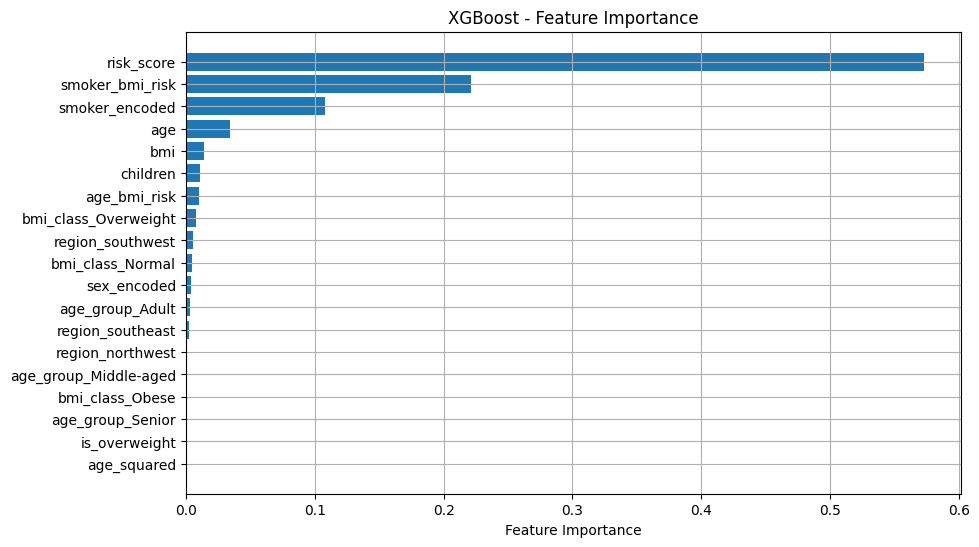

In [11]:
feature_names = X_train.columns.tolist()

# Get and display the importance table
importance_df = get_feature_importance_df(best_model_obj, feature_names, best_model_name)
print(f"\nFeature Importance Ranking for {best_model_name}:\n")
print(importance_df.to_string(index=True))

plot_tree_model_features(best_model_obj, feature_names, f"{best_model_name} - Feature Importance")



## Refit pipeline with the Best Features

The feature importance table and plot shows the most important features for the model. We can see that the `risk_score, smoker_bmi_risk, smoker_encoded, age, bmi, children, age_bmi_risk` are the most important features for the model. However, we can see that the `age_squared, is_overweight, age_group_*, bmi_class_*, most region_*, sex_encoded` are not important features for the model. This means that we can remove these features from the dataset and retrain the model to see if we can improve the performance.

In [12]:
features_to_drop = ["age_squared", "is_overweight", 
    "age_group_Senior", "bmi_class_Obese", "age_group_Middle-aged",
    "region_northwest", "region_southeast", 
    "age_group_Adult", "sex_encoded",
    "bmi_class_Normal", "bmi_class_Overweight", "region_southwest"]

In [13]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Drop low-importance features
X_reduced = X.drop(columns=[col for col in features_to_drop if col in X.columns])

# Re-split with new feature set
from sklearn.model_selection import train_test_split
X_train_red, X_test_red, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Retrain the same model (use best_model_obj which is XGBoost)
best_model_obj.fit(X_train_red, y_train)

# Predict with reduced features
y_pred_red = best_model_obj.predict(X_test_red)

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_red = r2_score(y_test, y_pred_red)
rmse_red = np.sqrt(mean_squared_error(y_test, y_pred_red))
mae_red = mean_absolute_error(y_test, y_pred_red)

print("Evaluation After Dropping Low-Importance Features:")
print(f"R² Score:  {r2_red:.3f}")
print(f"RMSE:      ${rmse_red:.2f}")
print(f"MAE:       ${mae_red:.2f}")

Evaluation After Dropping Low-Importance Features:
R² Score:  0.874
RMSE:      $4424.12
MAE:       $2472.31


After retraining the model with the reduced dataset, we can see that the model performance had a slight improvement, with a R2 score of 0.874 (previusly 0.870). This means that the model is able to explain 87.4% of the variance in the target variable, which is a good result.

## Assess Feature Importance


Feature Importance Ranking for XGBoost:

           Feature  Importance
0  smoker_bmi_risk    0.580206
1       risk_score    0.280387
2   smoker_encoded    0.078692
3              age    0.033320
4              bmi    0.015608
5     age_bmi_risk    0.006642
6         children    0.005144


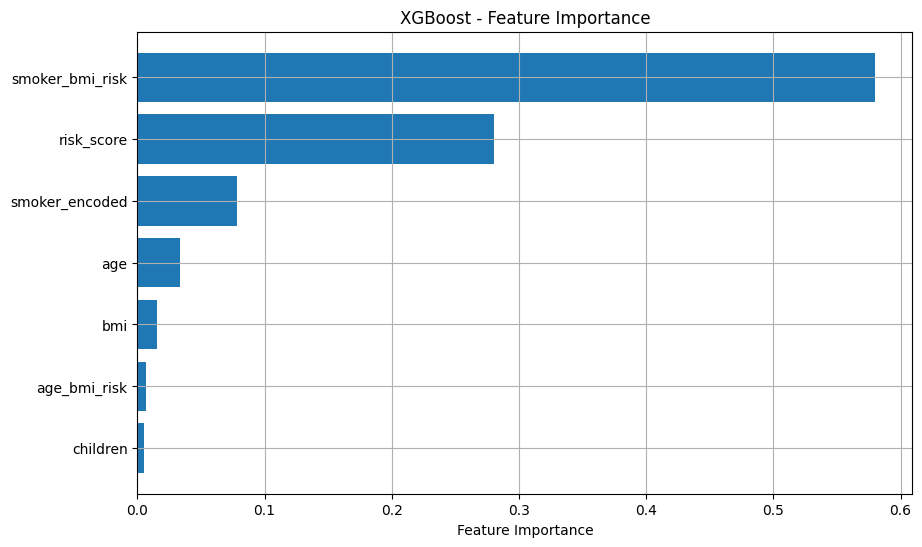

In [14]:
feature_names = X_reduced.columns.tolist()

# Get and display the importance table
importance_df = get_feature_importance_df(best_model_obj, feature_names, best_model_name)
print(f"\nFeature Importance Ranking for {best_model_name}:\n")
print(importance_df.to_string(index=True))

plot_tree_model_features(best_model_obj, feature_names, f"{best_model_name} - Feature Importance")


---

# Feature Engineering Transformation

In [15]:
def final_feature_engineering(df):  # your full engineering function

    # Drop low-importance features
    drop_cols = [
        "age_squared", "is_overweight", 
        "age_group_Senior", "bmi_class_Obese", "age_group_Middle-aged",
        "region_northwest", "region_southeast", 
        "age_group_Adult", "sex_encoded",
        "bmi_class_Normal", "bmi_class_Overweight", "region_southwest"
    ]
    df = df.drop(columns=[col for col in drop_cols if col in df.columns])
    
    # Separate X and y
    X = df.drop(columns=["charges"])
    y = df["charges"]

    return X, y

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineeringWrapper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # no fitting needed

    def transform(self, X):
        X_transformed, _ = final_feature_engineering(X)
        return X_transformed

In [17]:
from sklearn.pipeline import Pipeline

# Initialize pipeline
final_pipeline = Pipeline([
    ('feature_engineering', FeatureEngineeringWrapper()),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42, 
                           n_estimators=200, max_depth=6, learning_rate=0.1, subsample=1.0))
])

In [18]:
_, y_all = final_feature_engineering(df_processed)
final_pipeline.fit(df_processed, y_all)

Pipeline(steps=[('feature_engineering', FeatureEngineeringWrapper()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=200,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

Now we have a full reusable pipeline that can be used to transform the data and train the model. We can use this pipeline to transform new data and make predictions.

# Push files to Repo

In [19]:
import joblib
import os

version = 'v1'
file_path = f"outputs/ml_pipeline/predict_insurance_cost/{version}"

try:
    os.makedirs(name=file_path, exist_ok=True)
except Exception as e:
    print(e)


### Save train/test set

In [20]:
# Save train/test sets as CSV
X_train_red.to_csv(f"{file_path}/X_train.csv", index=False)
X_test_red.to_csv(f"{file_path}/X_test.csv", index=False)
y_train.to_csv(f"{file_path}/y_train.csv", index=False)
y_test.to_csv(f"{file_path}/y_test.csv", index=False)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib

# Define your feature engineering as a FunctionTransformer
def manual_feature_engineering(X):
    return X.drop(columns=features_to_drop)

feature_pipeline = Pipeline(steps=[
    ('custom_features', FunctionTransformer(manual_feature_engineering, validate=False))
])

# Save pipeline
joblib.dump(feature_pipeline, f"{file_path}/feature_pipeline.pkl")

['outputs/ml_pipeline/predict_insurance_cost/v1/feature_pipeline.pkl']

## Save feature importance plot

In [22]:
def save_tree_feature_importance_plot(model, feature_names, model_name, file_path):
    importances = model.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    top_features = [feature_names[i] for i in sorted_idx]
    top_importances = importances[sorted_idx]

    plt.figure(figsize=(10, 6))
    plt.barh(top_features, top_importances)
    plt.gca().invert_yaxis()
    plt.title(f"{model_name} - Feature Importance")
    plt.xlabel("Importance")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{file_path}/feature_importance_{model_name}.png")
    plt.close()

In [23]:
# Save the appropriate plot
save_tree_feature_importance_plot(best_model_obj, X_reduced.columns.tolist(), best_model_name, file_path)


## Save model pipeline

In [24]:
joblib.dump(final_pipeline, f"{file_path}/clf_pipeline.pkl")

['outputs/ml_pipeline/predict_insurance_cost/v1/clf_pipeline.pkl']